In [1]:
# Imports
# Gymnasium imports
import gymnasium as gym 
from gymnasium import Env
from gymnasium.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Import helpers
import numpy as np
import pandas as pd
import random
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

from collections import deque

# Import stable baselines
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

from Environment.env_v8 import *
from Functions.visualization_functions import *

In [2]:
# Configuration of the network
with open('./Config/network_config_v1.json') as file:
    network_config = file.read()

In [3]:
EP_LENGTH = 100

# stockout_cost = 50
# order_cost = 2
# item_cost = 0.05
# stock_cost = 0.1
# item_prize = 20

# env = SS_Mngmt_Env(
#     network_config=network_config,
#     EP_LENGTH=EP_LENGTH,
#     render_mode="human",
#     model_type="PPO",
#     stockout_cost=stockout_cost,
#     order_cost=order_cost,
#     item_cost=item_cost,
#     stock_cost=stock_cost,
#     item_prize=item_prize,
#     order_quantities=[0, 20, 40, 80],
#     demand_mean=8,
#     demand_std=2,
#     demand_noise=0,
#     demand_noise_std=2,
# )

In [4]:
env = SS_Mngmt_Env(
    network_config=network_config,
    EP_LENGTH=EP_LENGTH,
    render_mode="human",
    model_type="PPO",
    stockout_cost=500,
    order_cost=2,
    item_cost=0.05,
    stock_cost=0.01,
    item_prize=20,
    stock_out_max=1000,
    order_quantities=[0, 20, 40, 80],
    demand_mean=8,
    demand_std=2,
    demand_noise=0,
    demand_noise_std=2,
)

check_env(env, warn=True)

In [5]:
episodes = 1
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, info, _ = env.step(action)
        score += reward

        env.render()

**************************************************

Episode Information
Episode Length: 1
Stock Level (Previous Timestep): [30.0, 30.0, 30.0]
Stock Level: [50. 50. 50.]
Planned Demand: [0. 0. 0.]
Actual Demand: [0. 0. 0.]
Action: [80, 20, 40]
Deliveries: [20 20 20]
Step Reward: -14.5
Total Reward: -14.5

Backlog:
[False, False, False]

Order Queue:
{   'A': deque([0, 0, 80], maxlen=3),
    'B': deque([0, 0, 20], maxlen=3),
    'C': deque([0, 0, 40], maxlen=3)}


Stockout Counter:  0
**************************************************

Episode Information
Episode Length: 2
Stock Level (Previous Timestep): [50.0, 50.0, 50.0]
Stock Level: [50. 50. 50.]
Planned Demand: [0. 0. 0.]
Actual Demand: [0. 0. 0.]
Action: [80, 0, 20]
Deliveries: [0 0 0]
Step Reward: -10.5
Total Reward: -25.0

Backlog:
[False, False, False]

Order Queue:
{   'A': deque([0, 80, 80], maxlen=3),
    'B': deque([0, 20, 0], maxlen=3),
    'C': deque([0, 40, 20], maxlen=3)}


Stockout Counter:  0
**************************

In [15]:
log_path = os.path.join('Training', 'Test', 'Logs')
model_path = os.path.join('Training', 'Test', 'Models', 'PPO')

In [16]:
dummy_env = DummyVecEnv([lambda: env])

model = PPO("MultiInputPolicy", 
            dummy_env,
            verbose=0,
            learning_rate=0.0001,
            gamma=0.99,
            clip_range=0.2,
            ent_coef=0.05,
            tensorboard_log=log_path)

In [17]:
model.learn(total_timesteps=250_000)

In [18]:
evaluate_policy(model, env, n_eval_episodes=10, render=True, return_episode_rewards=True)

/Users/jonasrenfer/miniconda3/envs/rl-scm/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


**************************************************

Episode Information
Episode Length: 1
Stock Level (Previous Timestep): [30.0, 30.0, 30.0]
Stock Level: [43. 50. 50.]
Planned Demand: [7. 0. 0.]
Actual Demand: [7. 0. 0.]
Action: [0, 20, 0]
Deliveries: [20 20 20]
Step Reward: 135.57
Total Reward: 135.57

Backlog:
[False, False, False]

Order Queue:
{   'A': deque([0, 0, 0], maxlen=3),
    'B': deque([0, 0, 20], maxlen=3),
    'C': deque([0, 0, 0], maxlen=3)}


Stockout Counter:  0
**************************************************

Episode Information
Episode Length: 2
Stock Level (Previous Timestep): [43.0, 50.0, 50.0]
Stock Level: [43. 46. 45.]
Planned Demand: [0. 5. 8.]
Actual Demand: [0. 4. 5.]
Action: [0, 20, 0]
Deliveries: [0 0 0]
Step Reward: 311.23
Total Reward: 311.23

Backlog:
[False, False, False]

Order Queue:
{   'A': deque([0, 0, 0], maxlen=3),
    'B': deque([0, 20, 20], maxlen=3),
    'C': deque([0, 0, 0], maxlen=3)}


Stockout Counter:  0
******************************

([-1491111.1284022331,
  -942692.1365361214,
  -1220521.0155220032,
  -1442635.9394893646,
  -2190810.1907320023,
  -1456349.5062422752,
  -1792816.0238628387,
  -1797739.941157341,
  -1676238.8853607178,
  -1526305.7238693237],
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

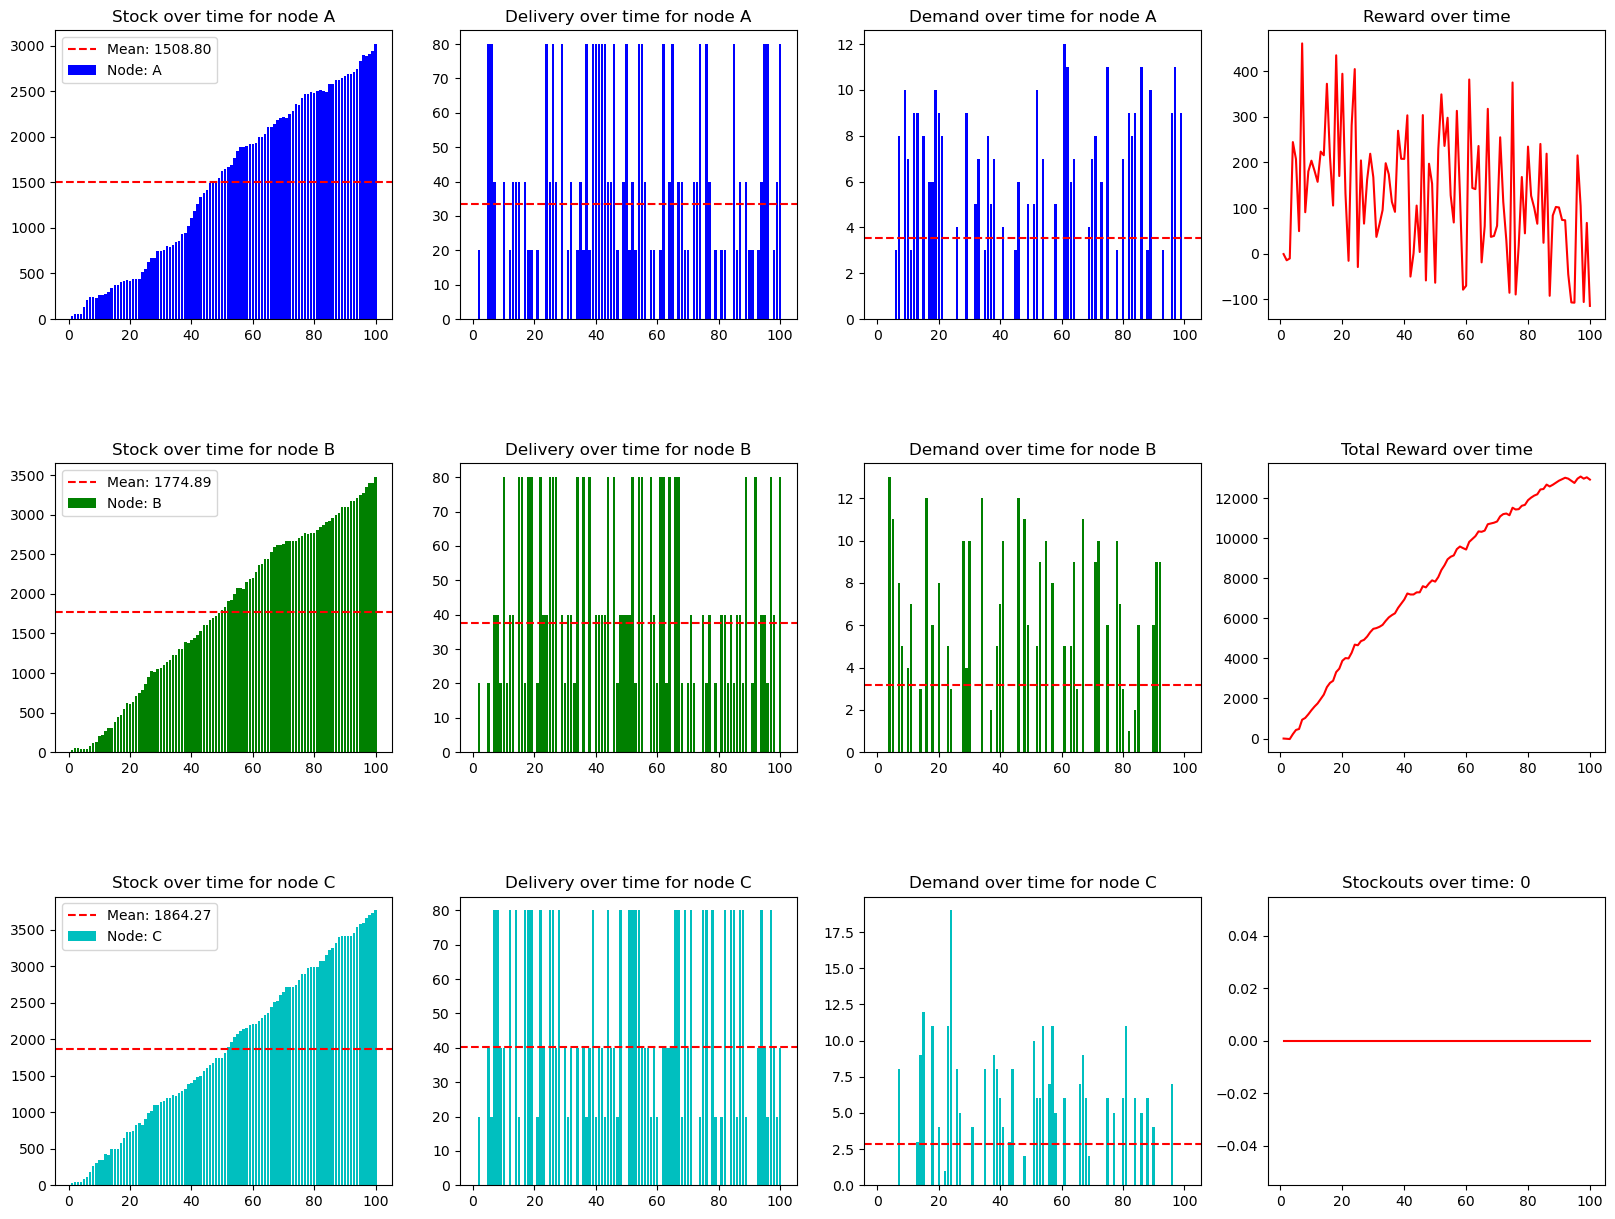

In [2]:
file = './Data/2024-11-30_16_last_environment_data_PPO.csv'
df = pd.read_csv(file)

plot_data(df)